In [ ]:
## struct4 uses Max Pooling in the pooling layers of the CNN model.
## dataset100sr_10tau is the dataset used.

In [ ]:
# Import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, utils, activations
from tensorflow.keras import optimizers, losses, metrics, preprocessing
from google.colab import drive

In [ ]:
# Connect to the Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_directory = "/content/drive/My Drive/dataset_100sr_10tau"
chart_title = "PQD CNN - struct1 - dataset100sr_10tau"
model_title = "pqd_cnn_struct1_dataset100sr_10tau_model.h5"

In [ ]:
# Import the training dataset
training_dataset = utils.image_dataset_from_directory(
    directory=dataset_directory + "/training_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 6000 files belonging to 10 classes.


In [ ]:
# Import the validation dataset
validation_dataset = utils.image_dataset_from_directory(
    directory=dataset_directory + "/validation_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 2000 files belonging to 10 classes.


In [ ]:
# Import the testing dataset
testing_dataset = utils.image_dataset_from_directory(
    directory=dataset_directory + "/testing_set",
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(200, 200)
)

Found 2000 files belonging to 10 classes.


In [ ]:
# Build the CNN model - struct4
cnn = models.Sequential()
# Add first convolution layer
cnn.add(layers.Conv2D(
    filters=32, 
    kernel_size=(5, 5), 
    padding='valid', 
    activation='relu', 
    input_shape=(200, 200, 1)
    )
)
cnn.add(layers.MaxPool2D(
    pool_size=(2, 2)
    )
)
# Add second convolution layer
cnn.add(layers.Conv2D(
    filters=48, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
cnn.add(layers.MaxPool2D(
    pool_size=(2, 2)
    )
)
# Add final convolution layer
cnn.add(layers.Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    padding='valid',
    activation='relu'
    )
)
# Add fully-connected layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(
    units=10,
    activation='softmax'
    )
)

In [ ]:
# Show the structure of the CNN
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 194, 194, 32)      1600      
                                                                 
 average_pooling2d (AverageP  (None, 97, 97, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 48)        38448     
                                                                 
 average_pooling2d_1 (Averag  (None, 46, 46, 48)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 64)        27712     
                                                                 
 flatten (Flatten)           (None, 123904)            0

In [ ]:
# Configure the CNN for training
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the CNN for 10 epochs with the training dataset
# Validate the CNN with the validation dataset
history = cnn.fit(
    training_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
188/188 [==============================] - 1351s 7s/step - loss: 9.1955 - accuracy: 0.8212 - val_loss: 0.1180 - val_accuracy: 0.9605
Epoch 2/10
188/188 [==============================] - 13s 66ms/step - loss: 0.1071 - accuracy: 0.9625 - val_loss: 0.0974 - val_accuracy: 0.9645
Epoch 3/10
188/188 [==============================] - 13s 66ms/step - loss: 0.0820 - accuracy: 0.9698 - val_loss: 0.0752 - val_accuracy: 0.9695
Epoch 4/10
188/188 [==============================] - 13s 66ms/step - loss: 0.0688 - accuracy: 0.9747 - val_loss: 0.0601 - val_accuracy: 0.9705
Epoch 5/10
188/188 [==============================] - 13s 67ms/step - loss: 0.0672 - accuracy: 0.9738 - val_loss: 0.0637 - val_accuracy: 0.9690
Epoch 6/10
188/188 [==============================] - 13s 66ms/step - loss: 0.0544 - accuracy: 0.9747 - val_loss: 0.0646 - val_accuracy: 0.9725
Epoch 7/10
188/188 [==============================] - 13s 66ms/step - loss: 0.0495 - accuracy: 0.9795 - val_loss: 0.0681 - val_accuracy:

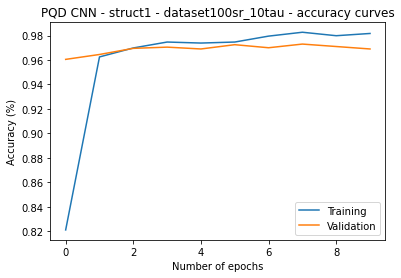

In [ ]:
# Plot the training and validation accuracy of the CNN
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(chart_title + " - accuracy curves")
plt.ylabel('Accuracy (%)')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

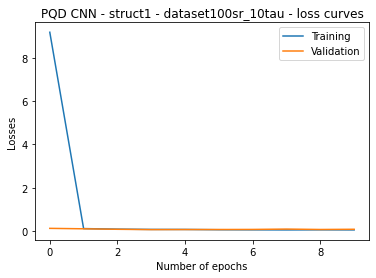

In [ ]:
# Plot the training and validation loss levels of the CNN
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(chart_title + " - loss curves")
plt.ylabel('Losses')
plt.xlabel('Number of epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Evaluate the CNN with the testing dataset
results = cnn.evaluate(
    testing_dataset
)

63/63 [==============================] - 354s 5s/step - loss: 0.0753 - accuracy: 0.9690


In [ ]:
# Save the trained model
cnn.save('/content/drive/My Drive/saved_models/' + model_title)